##Подключение диска и библиотек

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import librosa

In [0]:
import pandas as pd

In [0]:
import pickle

In [0]:
import numpy as np

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
from sklearn.metrics import classification_report

##Читаем данные

In [0]:
link = "/content/gdrive/My Drive/Аудиоаналитика/"

In [0]:
data_load = []
data_set = pd.read_csv(link + "train.csv")

In [11]:
data_set

,fname,label
0,8bcbcc394ba64fe85ed4.wav,Finger_snapping
1,00d77b917e241afa06f1.wav,Squeak
2,17bb93b73b8e79234cb3.wav,Electric_piano
3,7d5c7a40a936136da55e.wav,Harmonica
4,17e0ee7565a33d6c2326.wav,Snare_drum
...,...,...
5678,edd5f2d5bdab597ab6f1.wav,Cello
5679,cc489c6414c2c25bfa6d.wav,Shatter
5680,ac3177fbe1f9b0155920.wav,Cello
5681,9da56639ef3113293961.wav,Snare_drum


##Так как файлы уже готовы, можно просто подключить их. За одно задаем классификтор

In [0]:
with open(link + 'data.pickle', 'rb') as f:
  data_read = pickle.load(f)

In [0]:
with open(link + 'label.pickle', 'rb') as f:
  labels_read = pickle.load(f)

In [0]:
logistic = LogisticRegression()

## 1 Feature.chroma_stft по дефолту.

In [0]:
data_feature = []

for i in data_read:
    data = librosa.feature.chroma_stft(y=i, sr=8000)
    data_feature.append(data)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


### Выравниваем данные

In [0]:
max_len = 0
for i in data_feature:
  if max_len <= i.shape[1]:
    max_len = i.shape[1]

In [0]:
norm_data = []
for ss in data_feature:
  new_matrix = np.zeros((128, max_len)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data.append(new_matrix.ravel())

###Разбиваем на test и train, обучаем модель

In [0]:
X_train, X_test, y_train, y_test = train_test_split(norm_data, labels_read, test_size=1/3, random_state=42)

In [0]:
with open(link + 'train_X_def.pickle', 'wb') as X_data_train:
    pickle.dump(X_train, X_data_train)

with open(link + 'train_y_def.pickle', 'wb') as y_data_train:
    pickle.dump(y_train, y_data_train)

with open(link + 'test_X_def.pickle', 'wb') as X_data_test:
    pickle.dump(X_test, X_data_test)

with open(link + 'test_y_def.pickle', 'wb') as y_data_test:
    pickle.dump(y_test, y_data_test)

In [0]:
logistic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предсказываем классы для train и test, сохраняем полученные результаты

In [0]:
prediction_1 = logistic.predict(X_test)

print(classification_report(y_test, prediction_1, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.1184    0.1525    0.1333        59
             Applause     0.2360    0.3889    0.2937        54
                 Bark     0.1053    0.1081    0.1067        37
            Bass_drum     0.2588    0.4231    0.3212        52
Burping_or_eructation     0.0385    0.0227    0.0286        44
                  Bus     0.2000    0.1000    0.1333        20
                Cello     0.0976    0.1356    0.1135        59
                Chime     0.0909    0.0385    0.0541        26
             Clarinet     0.2051    0.2667    0.2319        60
    Computer_keyboard     0.0000    0.0000    0.0000        18
                Cough     0.0667    0.0545    0.0600        55
              Cowbell     0.6250    0.6250    0.6250        32
          Double_bass     0.1209    0.1642    0.1392        67
 Drawer_open_or_close     0.0385    0.0357    0.0370        28
       Electric_piano     0.2500    0.3333    0.2857  

In [0]:
prediction_2 = logistic.predict(X_train)

print(classification_report(y_train, prediction_2, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.8855    0.9062    0.8958       128
             Applause     1.0000    0.9922    0.9961       129
                 Bark     0.9706    0.9000    0.9340       110
            Bass_drum     0.6561    0.7984    0.7203       129
Burping_or_eructation     0.8276    0.6957    0.7559        69
                  Bus     1.0000    0.9773    0.9885        44
                Cello     0.9421    0.8976    0.9194       127
                Chime     1.0000    1.0000    1.0000        52
             Clarinet     0.8943    0.9483    0.9205       116
    Computer_keyboard     1.0000    0.9583    0.9787        48
                Cough     0.8411    0.8333    0.8372       108
              Cowbell     0.9302    0.9412    0.9357        85
          Double_bass     0.7397    0.8710    0.8000       124
 Drawer_open_or_close     0.9242    0.9242    0.9242        66
       Electric_piano     0.8529    0.9667    0.9062  

In [0]:
np.save(link + 'prediction_test_def', prediction_1)
np.save(link + 'prediction_train_def', prediction_2)

## 2 Feature.chroma_stft n_fft=1024 hop_length=512

In [0]:
data_feature_2 = []

for i in data_read:
    data_2 = librosa.feature.chroma_stft(y=i, sr=8000, n_fft=1024)
    data_feature_2.append(data_2)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


### Выравниваем данные

In [0]:
max_len = 0
for i in data_feature_2:
  if max_len <= i.shape[1]:
    max_len = i.shape[1]

In [0]:
norm_data_2 = []
for ss in data_feature_2:
  new_matrix = np.zeros((128, max_len)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data_2.append(new_matrix.ravel())

###Разбиваем на test и train, обучаем модель

In [0]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(norm_data_2, labels_read, test_size=1/3, random_state=42)

In [0]:
with open(link + 'train_X_n_fft=1024.pickle', 'wb') as X_data_train:
    pickle.dump(X_train_2, X_data_train)

with open(link + 'train_y_n_fft=1024.pickle', 'wb') as y_data_train:
    pickle.dump(y_train_2, y_data_train)

with open(link + 'test_X_n_fft=1024.pickle', 'wb') as X_data_test:
    pickle.dump(X_test_2, X_data_test)

with open(link + 'test_y_n_fft=1024.pickle', 'wb') as y_data_test:
    pickle.dump(y_test_2, y_data_test)

In [0]:
logistic.fit(X_train_2, y_train_2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предсказываем классы для train и test, сохраняем полученные результаты

In [0]:
prediction_3 = logistic.predict(X_test_2)

print(classification_report(y_test_2, prediction_3, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.1446    0.2034    0.1690        59
             Applause     0.1884    0.2407    0.2114        54
                 Bark     0.0513    0.0541    0.0526        37
            Bass_drum     0.1923    0.3846    0.2564        52
Burping_or_eructation     0.0417    0.0227    0.0294        44
                  Bus     0.1200    0.1500    0.1333        20
                Cello     0.1011    0.1525    0.1216        59
                Chime     0.0588    0.0385    0.0465        26
             Clarinet     0.1705    0.2500    0.2027        60
    Computer_keyboard     0.0000    0.0000    0.0000        18
                Cough     0.0571    0.0364    0.0444        55
              Cowbell     0.6129    0.5938    0.6032        32
          Double_bass     0.1900    0.2836    0.2275        67
 Drawer_open_or_close     0.0800    0.0714    0.0755        28
       Electric_piano     0.2609    0.2857    0.2727  

In [0]:
prediction_4 = logistic.predict(X_train_2)

print(classification_report(y_train_2, prediction_4, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.9375    0.9375    0.9375       128
             Applause     1.0000    1.0000    1.0000       129
                 Bark     0.9259    0.9091    0.9174       110
            Bass_drum     0.6558    0.7829    0.7138       129
Burping_or_eructation     0.9016    0.7971    0.8462        69
                  Bus     1.0000    0.9773    0.9885        44
                Cello     0.9606    0.9606    0.9606       127
                Chime     1.0000    1.0000    1.0000        52
             Clarinet     0.9496    0.9741    0.9617       116
    Computer_keyboard     1.0000    0.9583    0.9787        48
                Cough     0.8785    0.8704    0.8744       108
              Cowbell     0.9873    0.9176    0.9512        85
          Double_bass     0.8295    0.8629    0.8458       124
 Drawer_open_or_close     0.9403    0.9545    0.9474        66
       Electric_piano     0.9355    0.9667    0.9508  

In [0]:
np.save(link + 'prediction_test_n_fft=1024', prediction_3)
np.save(link + 'prediction_train_n_fft=1024', prediction_4)

## 3 Feature.chroma_stft n_fft=1024 hop_length=256

In [0]:
data_feature_3 = []

for i in data_read:
    data_3 = librosa.feature.chroma_stft(y=i, sr=8000, n_fft=1024, hop_length=256)
    data_feature_3.append(data_3)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


### Выравниваем данные

In [0]:
max_len = 0
for i in data_feature_3:
  if max_len <= i.shape[1]:
    max_len = i.shape[1]

In [0]:
norm_data_3 = []
for ss in data_feature_3:
  new_matrix = np.zeros((128, max_len)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data_3.append(new_matrix.ravel())

###Разбиваем на test и train, обучаем модель

In [0]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(norm_data_3, labels_read, test_size=1/3, random_state=42)

In [0]:
with open(link + 'train_X_n_fft=1024_hop_length=256.pickle', 'wb') as X_data_train:
    pickle.dump(X_train_3, X_data_train)

with open(link + 'train_y_n_fft=1024_hop_length=256.pickle', 'wb') as y_data_train:
    pickle.dump(y_train_3, y_data_train)

with open(link + 'test_X_n_fft=1024_hop_length=256.pickle', 'wb') as X_data_test:
    pickle.dump(X_test_3, X_data_test)

with open(link + 'test_y_n_fft=1024_hop_length=256.pickle', 'wb') as y_data_test:
    pickle.dump(y_test_3, y_data_test)

In [0]:
logistic.fit(X_train_3, y_train_3)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предсказываем классы для train и test, сохраняем полученные результаты

In [0]:
prediction_5 = logistic.predict(X_test_3)

print(classification_report(y_test_3, prediction_5, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.1196    0.1864    0.1457        59
             Applause     0.1667    0.2222    0.1905        54
                 Bark     0.0952    0.1081    0.1013        37
            Bass_drum     0.2019    0.4038    0.2692        52
Burping_or_eructation     0.0345    0.0227    0.0274        44
                  Bus     0.4286    0.1500    0.2222        20
                Cello     0.1200    0.1525    0.1343        59
                Chime     0.1053    0.0769    0.0889        26
             Clarinet     0.2045    0.3000    0.2432        60
    Computer_keyboard     0.0000    0.0000    0.0000        18
                Cough     0.0556    0.0364    0.0440        55
              Cowbell     0.6250    0.6250    0.6250        32
          Double_bass     0.2088    0.2836    0.2405        67
 Drawer_open_or_close     0.0769    0.0714    0.0741        28
       Electric_piano     0.1628    0.3333    0.2188  

In [0]:
prediction_6 = logistic.predict(X_train_3)

print(classification_report(y_train_3, prediction_6, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.9524    0.9375    0.9449       128
             Applause     1.0000    1.0000    1.0000       129
                 Bark     0.9633    0.9545    0.9589       110
            Bass_drum     0.7550    0.8837    0.8143       129
Burping_or_eructation     0.9365    0.8551    0.8939        69
                  Bus     1.0000    0.9773    0.9885        44
                Cello     0.9692    0.9921    0.9805       127
                Chime     1.0000    1.0000    1.0000        52
             Clarinet     0.9744    0.9828    0.9785       116
    Computer_keyboard     1.0000    0.9792    0.9895        48
                Cough     0.9273    0.9444    0.9358       108
              Cowbell     0.9877    0.9412    0.9639        85
          Double_bass     0.9333    0.9032    0.9180       124
 Drawer_open_or_close     0.9844    0.9545    0.9692        66
       Electric_piano     0.9355    0.9667    0.9508  

In [0]:
np.save(link + 'prediction_test_n_fft=1024_hop_length=256', prediction_5)
np.save(link + 'prediction_train_n_fft=1024_hop_length=256', prediction_6)

## 4 Feature.chroma_stft n_fft=512 hop_length=256

In [0]:
data_feature_4 = []

for i in data_read:
    data_4 = librosa.feature.chroma_stft(y=i, sr=8000, n_fft=512, hop_length=256)
    data_feature_4.append(data_4)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


### Выравниваем данные

In [0]:
max_len = 0
for i in data_feature_4:
  if max_len <= i.shape[1]:
    max_len = i.shape[1]

In [0]:
norm_data_4 = []
for ss in data_feature_4:
  new_matrix = np.zeros((128, max_len)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data_4.append(new_matrix.ravel())

### Разбиваем на test и train, обучаем модель

In [0]:
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(norm_data_4, labels_read, test_size=1/3, random_state=42)

In [0]:
with open(link + 'train_X_n_fft=512_hop_length=256.pickle', 'wb') as X_data_train:
    pickle.dump(X_train_4, X_data_train)

with open(link + 'train_y_n_fft=512_hop_length=256.pickle', 'wb') as y_data_train:
    pickle.dump(y_train_4, y_data_train)

with open(link + 'test_X_n_fft=512_hop_length=256.pickle', 'wb') as X_data_test:
    pickle.dump(X_test_4, X_data_test)

with open(link + 'test_y_n_fft=512_hop_length=256.pickle', 'wb') as y_data_test:
    pickle.dump(y_test_4, y_data_test)

In [0]:
logistic.fit(X_train_4, y_train_4)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предсказываем классы для train и test, сохраняем полученные результаты

In [0]:
prediction_7 = logistic.predict(X_test_4)

print(classification_report(y_test_4, prediction_7, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.1648    0.2542    0.2000        59
             Applause     0.1739    0.1481    0.1600        54
                 Bark     0.1600    0.1081    0.1290        37
            Bass_drum     0.1860    0.4615    0.2652        52
Burping_or_eructation     0.1429    0.0909    0.1111        44
                  Bus     0.1000    0.1500    0.1200        20
                Cello     0.0741    0.1356    0.0958        59
                Chime     0.0667    0.0385    0.0488        26
             Clarinet     0.2025    0.2667    0.2302        60
    Computer_keyboard     0.0000    0.0000    0.0000        18
                Cough     0.0444    0.0364    0.0400        55
              Cowbell     0.6667    0.6250    0.6452        32
          Double_bass     0.1481    0.2388    0.1829        67
 Drawer_open_or_close     0.0769    0.0357    0.0488        28
       Electric_piano     0.0889    0.1905    0.1212  

In [0]:
prediction_8 = logistic.predict(X_train_4)

print(classification_report(y_train_4, prediction_8, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.9680    0.9453    0.9565       128
             Applause     1.0000    1.0000    1.0000       129
                 Bark     1.0000    0.9727    0.9862       110
            Bass_drum     0.8311    0.9535    0.8881       129
Burping_or_eructation     0.9394    0.8986    0.9185        69
                  Bus     1.0000    0.9773    0.9885        44
                Cello     0.9843    0.9843    0.9843       127
                Chime     1.0000    1.0000    1.0000        52
             Clarinet     0.9828    0.9828    0.9828       116
    Computer_keyboard     1.0000    0.9792    0.9895        48
                Cough     0.9815    0.9815    0.9815       108
              Cowbell     0.9880    0.9647    0.9762        85
          Double_bass     0.9440    0.9516    0.9478       124
 Drawer_open_or_close     0.9848    0.9848    0.9848        66
       Electric_piano     0.9655    0.9333    0.9492  

In [0]:
np.save(link + 'prediction_test_n_fft=512_hop_length=256', prediction_7)
np.save(link + 'prediction_train_n_fft=512_hop_length=256', prediction_8)

## 5 Feature.chroma_stft n_fft=4096 hop_length=1024

In [22]:
data_feature_5 = []

for i in data_read:
    data_5 = librosa.feature.chroma_stft(y=i, sr=8000, n_fft=4096, hop_length=1024)
    data_feature_5.append(data_5)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


### Выравниваем данные

In [0]:
max_len = 0
for i in data_feature_5:
  if max_len <= i.shape[1]:
    max_len = i.shape[1]

In [0]:
norm_data_5 = []
for ss in data_feature_5:
  new_matrix = np.zeros((128, max_len)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data_5.append(new_matrix.ravel())

### Разбиваем на test и train, обучаем модель

In [0]:
X_train_5, X_test_5, y_train_5, y_test_5 = train_test_split(norm_data_5, labels_read, test_size=1/3, random_state=42)

In [0]:
with open(link + 'train_X_n_fft=4096_hop_length=1024.pickle', 'wb') as X_data_train:
    pickle.dump(X_train_5, X_data_train)

with open(link + 'train_y_n_fft=4096_hop_length=1024.pickle', 'wb') as y_data_train:
    pickle.dump(y_train_5, y_data_train)

with open(link + 'test_X_n_fft=4096_hop_length=1024.pickle', 'wb') as X_data_test:
    pickle.dump(X_test_5, X_data_test)

with open(link + 'test_y_n_fft=4096_hop_length=1024.pickle', 'wb') as y_data_test:
    pickle.dump(y_test_5, y_data_test)

In [27]:
logistic.fit(X_train_5, y_train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предсказываем классы для train и test, сохраняем полученные результаты

In [28]:
prediction_9 = logistic.predict(X_test_5)

print(classification_report(y_test_5, prediction_9, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.1233    0.1525    0.1364        59
             Applause     0.2706    0.4259    0.3309        54
                 Bark     0.0571    0.0541    0.0556        37
            Bass_drum     0.2447    0.4423    0.3151        52
Burping_or_eructation     0.1250    0.0455    0.0667        44
                  Bus     0.0000    0.0000    0.0000        20
                Cello     0.1270    0.1356    0.1311        59
                Chime     0.0000    0.0000    0.0000        26
             Clarinet     0.1685    0.2500    0.2013        60
    Computer_keyboard     0.0000    0.0000    0.0000        18
                Cough     0.0682    0.0545    0.0606        55
              Cowbell     0.6000    0.6562    0.6269        32
          Double_bass     0.2208    0.2537    0.2361        67
 Drawer_open_or_close     0.0870    0.0714    0.0784        28
       Electric_piano     0.2286    0.3810    0.2857  

In [29]:
prediction_10 = logistic.predict(X_train_5)

print(classification_report(y_train_5, prediction_10, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.8824    0.8203    0.8502       128
             Applause     1.0000    0.9767    0.9882       129
                 Bark     0.9785    0.8273    0.8966       110
            Bass_drum     0.4889    0.6822    0.5696       129
Burping_or_eructation     0.7347    0.5217    0.6102        69
                  Bus     1.0000    0.8636    0.9268        44
                Cello     0.8125    0.8189    0.8157       127
                Chime     1.0000    0.9615    0.9804        52
             Clarinet     0.7023    0.7931    0.7449       116
    Computer_keyboard     0.9556    0.8958    0.9247        48
                Cough     0.7071    0.6481    0.6763       108
              Cowbell     0.8333    0.8824    0.8571        85
          Double_bass     0.5602    0.7500    0.6414       124
 Drawer_open_or_close     0.7353    0.7576    0.7463        66
       Electric_piano     0.8438    0.9000    0.8710  

In [0]:
np.save(link + 'prediction_test_n_fft=4096_hop_length=1024', prediction_9)
np.save(link + 'prediction_train_n_fft=4096_hop_length=1024', prediction_10)

## 6 Feature.chroma_stft n_fft=8192 hop_length=1024

In [0]:
data_feature_6 = []

for i in data_read:
    data_6 = librosa.feature.chroma_stft(y=i, sr=8000, n_fft=8192, hop_length=1024)
    data_feature_6.append(data_6)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


### Выравниваем данные

In [0]:
max_len = 0
for i in data_feature_6:
  if max_len <= i.shape[1]:
    max_len = i.shape[1]

In [0]:
norm_data_6 = []
for ss in data_feature_6:
  new_matrix = np.zeros((128, max_len)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data_6.append(new_matrix.ravel())

### Разбиваем на test и train, обучаем модель

In [0]:
X_train_6, X_test_6, y_train_6, y_test_6 = train_test_split(norm_data_6, labels_read, test_size=1/3, random_state=42)

In [0]:
with open(link + 'train_X_n_fft=8192_hop_length=1024.pickle', 'wb') as X_data_train:
    pickle.dump(X_train_6, X_data_train)

with open(link + 'train_y_n_fft=8192_hop_length=1024.pickle', 'wb') as y_data_train:
    pickle.dump(y_train_6, y_data_train)

with open(link + 'test_X_n_fft=8192_hop_length=1024', 'wb') as X_data_test:
    pickle.dump(X_test_6, X_data_test)

with open(link + 'test_y_n_fft=8192_hop_length=1024.pickle', 'wb') as y_data_test:
    pickle.dump(y_test_6, y_data_test)

In [0]:
logistic.fit(X_train_6, y_train_6)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предсказываем классы для train и test, сохраняем полученные результаты

In [0]:
prediction_11 = logistic.predict(X_test_6)

print(classification_report(y_test_6, prediction_11, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.1341    0.1864    0.1560        59
             Applause     0.2185    0.4815    0.3006        54
                 Bark     0.1282    0.1351    0.1316        37
            Bass_drum     0.1863    0.3654    0.2468        52
Burping_or_eructation     0.1818    0.0455    0.0727        44
                  Bus     0.0833    0.0500    0.0625        20
                Cello     0.1500    0.1525    0.1513        59
                Chime     0.0625    0.0385    0.0476        26
             Clarinet     0.1806    0.2167    0.1970        60
    Computer_keyboard     0.0000    0.0000    0.0000        18
                Cough     0.0690    0.0727    0.0708        55
              Cowbell     0.6250    0.6250    0.6250        32
          Double_bass     0.2041    0.2985    0.2424        67
 Drawer_open_or_close     0.0714    0.0714    0.0714        28
       Electric_piano     0.1935    0.2857    0.2308  

In [0]:
prediction_12 = logistic.predict(X_train_6)

print(classification_report(y_train_6, prediction_12, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.8131    0.6797    0.7404       128
             Applause     0.9167    0.9380    0.9272       129
                 Bark     0.9121    0.7545    0.8259       110
            Bass_drum     0.4021    0.6047    0.4830       129
Burping_or_eructation     0.6750    0.3913    0.4954        69
                  Bus     1.0000    0.7955    0.8861        44
                Cello     0.6429    0.7087    0.6742       127
                Chime     0.9792    0.9038    0.9400        52
             Clarinet     0.7250    0.7500    0.7373       116
    Computer_keyboard     0.9773    0.8958    0.9348        48
                Cough     0.6087    0.6481    0.6278       108
              Cowbell     0.7957    0.8706    0.8315        85
          Double_bass     0.4556    0.6210    0.5256       124
 Drawer_open_or_close     0.7818    0.6515    0.7107        66
       Electric_piano     0.8413    0.8833    0.8618  

In [0]:
np.save(link + 'prediction_test_n_fft=8192_hop_length=1024', prediction_11)
np.save(link + 'prediction_train_n_fft=8192_hop_length=1024', prediction_12)

## 7 Feature.chroma_stft n_fft=8192 hop_length=2048

In [0]:
data_feature_7 = []

for i in data_read:
    data_7 = librosa.feature.chroma_stft(y=i, sr=8000, n_fft=8192, hop_length=2048)
    data_feature_7.append(data_7)

/usr/local/lib/python3.6/dist-packages/librosa/core/pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


### Выравниваем данные

In [0]:
max_len = 0
for i in data_feature_7:
  if max_len <= i.shape[1]:
    max_len = i.shape[1]

In [0]:
norm_data_7 = []
for ss in data_feature_7:
  new_matrix = np.zeros((128, max_len)) 
  for i in range(ss.shape[0]):
    for j in range(ss.shape[1]):
      new_matrix[i][j] += ss[i][j]
  norm_data_7.append(new_matrix.ravel())

### Разбиваем на test и train, обучаем модель

In [0]:
X_train_7, X_test_7, y_train_7, y_test_7 = train_test_split(norm_data_7, labels_read, test_size=1/3, random_state=42)

In [0]:
with open(link + 'train_X_n_fft=8192_hop_length=2048.pickle', 'wb') as X_data_train:
    pickle.dump(X_train_7, X_data_train)

with open(link + 'train_y_n_fft=8192_hop_length=2048.pickle', 'wb') as y_data_train:
    pickle.dump(y_train_7, y_data_train)

with open(link + 'test_X_n_fft=8192_hop_length=2048', 'wb') as X_data_test:
    pickle.dump(X_test_7, X_data_test)

with open(link + 'test_y_n_fft=8192_hop_length=2048.pickle', 'wb') as y_data_test:
    pickle.dump(y_test_7, y_data_test)

In [0]:
logistic.fit(X_train_7, y_train_7)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Предсказываем классы для train и test, сохраняем полученные результаты

In [0]:
prediction_13 = logistic.predict(X_test_7)

print(classification_report(y_test_7, prediction_13, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.1408    0.1695    0.1538        59
             Applause     0.2035    0.4259    0.2754        54
                 Bark     0.1143    0.1081    0.1111        37
            Bass_drum     0.1683    0.3269    0.2222        52
Burping_or_eructation     0.0769    0.0227    0.0351        44
                  Bus     0.0833    0.0500    0.0625        20
                Cello     0.1613    0.1695    0.1653        59
                Chime     0.0000    0.0000    0.0000        26
             Clarinet     0.2500    0.2833    0.2656        60
    Computer_keyboard     0.0000    0.0000    0.0000        18
                Cough     0.0889    0.0727    0.0800        55
              Cowbell     0.6000    0.6562    0.6269        32
          Double_bass     0.1474    0.2090    0.1728        67
 Drawer_open_or_close     0.0909    0.0714    0.0800        28
       Electric_piano     0.1579    0.2857    0.2034  

In [0]:
prediction_14 = logistic.predict(X_train_7)

print(classification_report(y_train_7, prediction_14, digits = 4))

                       precision    recall  f1-score   support

      Acoustic_guitar     0.7407    0.6250    0.6780       128
             Applause     0.8923    0.8992    0.8958       129
                 Bark     0.8750    0.7000    0.7778       110
            Bass_drum     0.3547    0.5581    0.4337       129
Burping_or_eructation     0.6341    0.3768    0.4727        69
                  Bus     0.9444    0.7727    0.8500        44
                Cello     0.5942    0.6457    0.6189       127
                Chime     0.9000    0.8654    0.8824        52
             Clarinet     0.7179    0.7241    0.7210       116
    Computer_keyboard     0.9512    0.8125    0.8764        48
                Cough     0.5182    0.5278    0.5229       108
              Cowbell     0.7444    0.7882    0.7657        85
          Double_bass     0.4011    0.6048    0.4823       124
 Drawer_open_or_close     0.7213    0.6667    0.6929        66
       Electric_piano     0.6957    0.8000    0.7442  

In [0]:
np.save(link + 'prediction_test_n_fft=8192_hop_length=2048', prediction_13)
np.save(link + 'prediction_train_n_fft=8192_hop_length=2048', prediction_14)

## Небольшой вывод

В ходе проведенных испытаний было установлено, что для логистической регрессии LogisticRegression() наилучший результат weighted avg = 0.1624 достигается при параметрах n_fft и hop_length функции librosa.feature.chroma_stft, равных 4096 и 1024 соответственно

## Построение матрицы путаницы

In [0]:
import warnings
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## Подгружаем необходимые данные

In [0]:
labels = []
for label in data_set['label']:
    if label not in labels:
        labels.append(label)

In [0]:
# весрия numpy, при которой не тупит np.load на Google Drive
#!pip install numpy==1.16.1

In [0]:
with open(link + 'train_y_n_fft=4096_hop_length=1024.pickle', 'rb') as f:
  label_train = pickle.load(f)

with open(link + 'test_y_n_fft=4096_hop_length=1024.pickle', 'rb') as f:
  label_test = pickle.load(f)

In [0]:
prediction_test = np.load(link + 'prediction_test_n_fft=4096_hop_length=1024.npy')
prediction_train = np.load(link + 'prediction_train_n_fft=4096_hop_length=1024.npy')

### Матрица для TEST

[[0.15254237 0.         0.01694915 ... 0.01694915 0.11864407 0.        ]
 [0.03703704 0.42592593 0.05555556 ... 0.03703704 0.         0.07407407]
 [0.02702703 0.10810811 0.05405405 ... 0.         0.         0.02702703]
 ...
 [0.04477612 0.01492537 0.01492537 ... 0.11940299 0.         0.        ]
 [0.13114754 0.         0.         ... 0.         0.18032787 0.        ]
 [0.01694915 0.18644068 0.03389831 ... 0.         0.         0.11864407]]


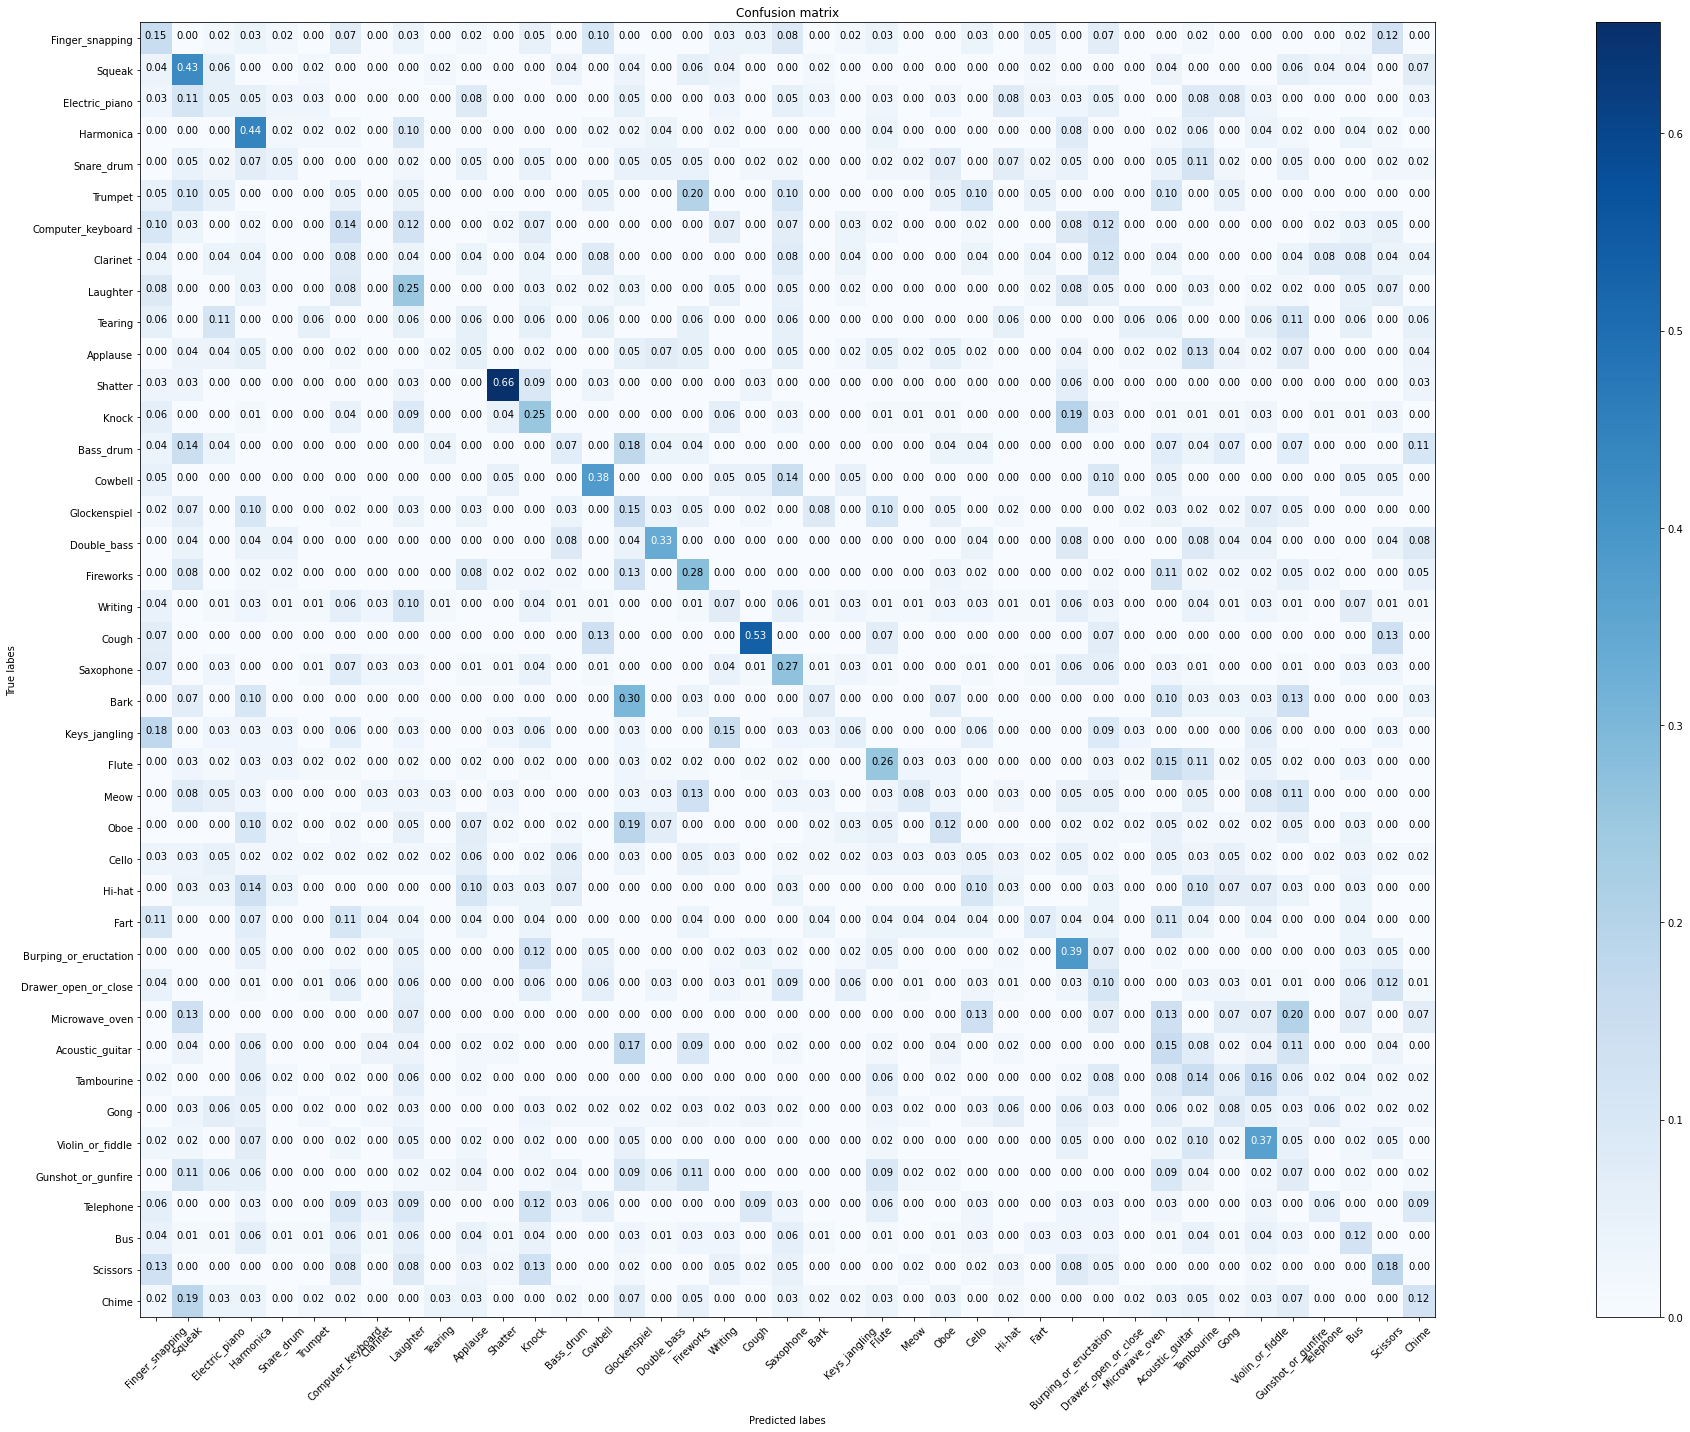

In [16]:
cm = confusion_matrix(label_test, prediction_test)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
title='Confusion matrix'
print(cm)

plt.figure(figsize=(45,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labes')
plt.xlabel('Predicted labes')
plt.tight_layout()
plt.show()

## Матрица для TRAIN

[[0.8203125  0.         0.         ... 0.0078125  0.0078125  0.        ]
 [0.         0.97674419 0.         ... 0.         0.         0.        ]
 [0.         0.         0.82727273 ... 0.         0.00909091 0.        ]
 ...
 [0.         0.         0.         ... 0.70247934 0.00826446 0.00826446]
 [0.01886792 0.         0.         ... 0.         0.70754717 0.        ]
 [0.         0.         0.         ... 0.         0.         0.7745098 ]]


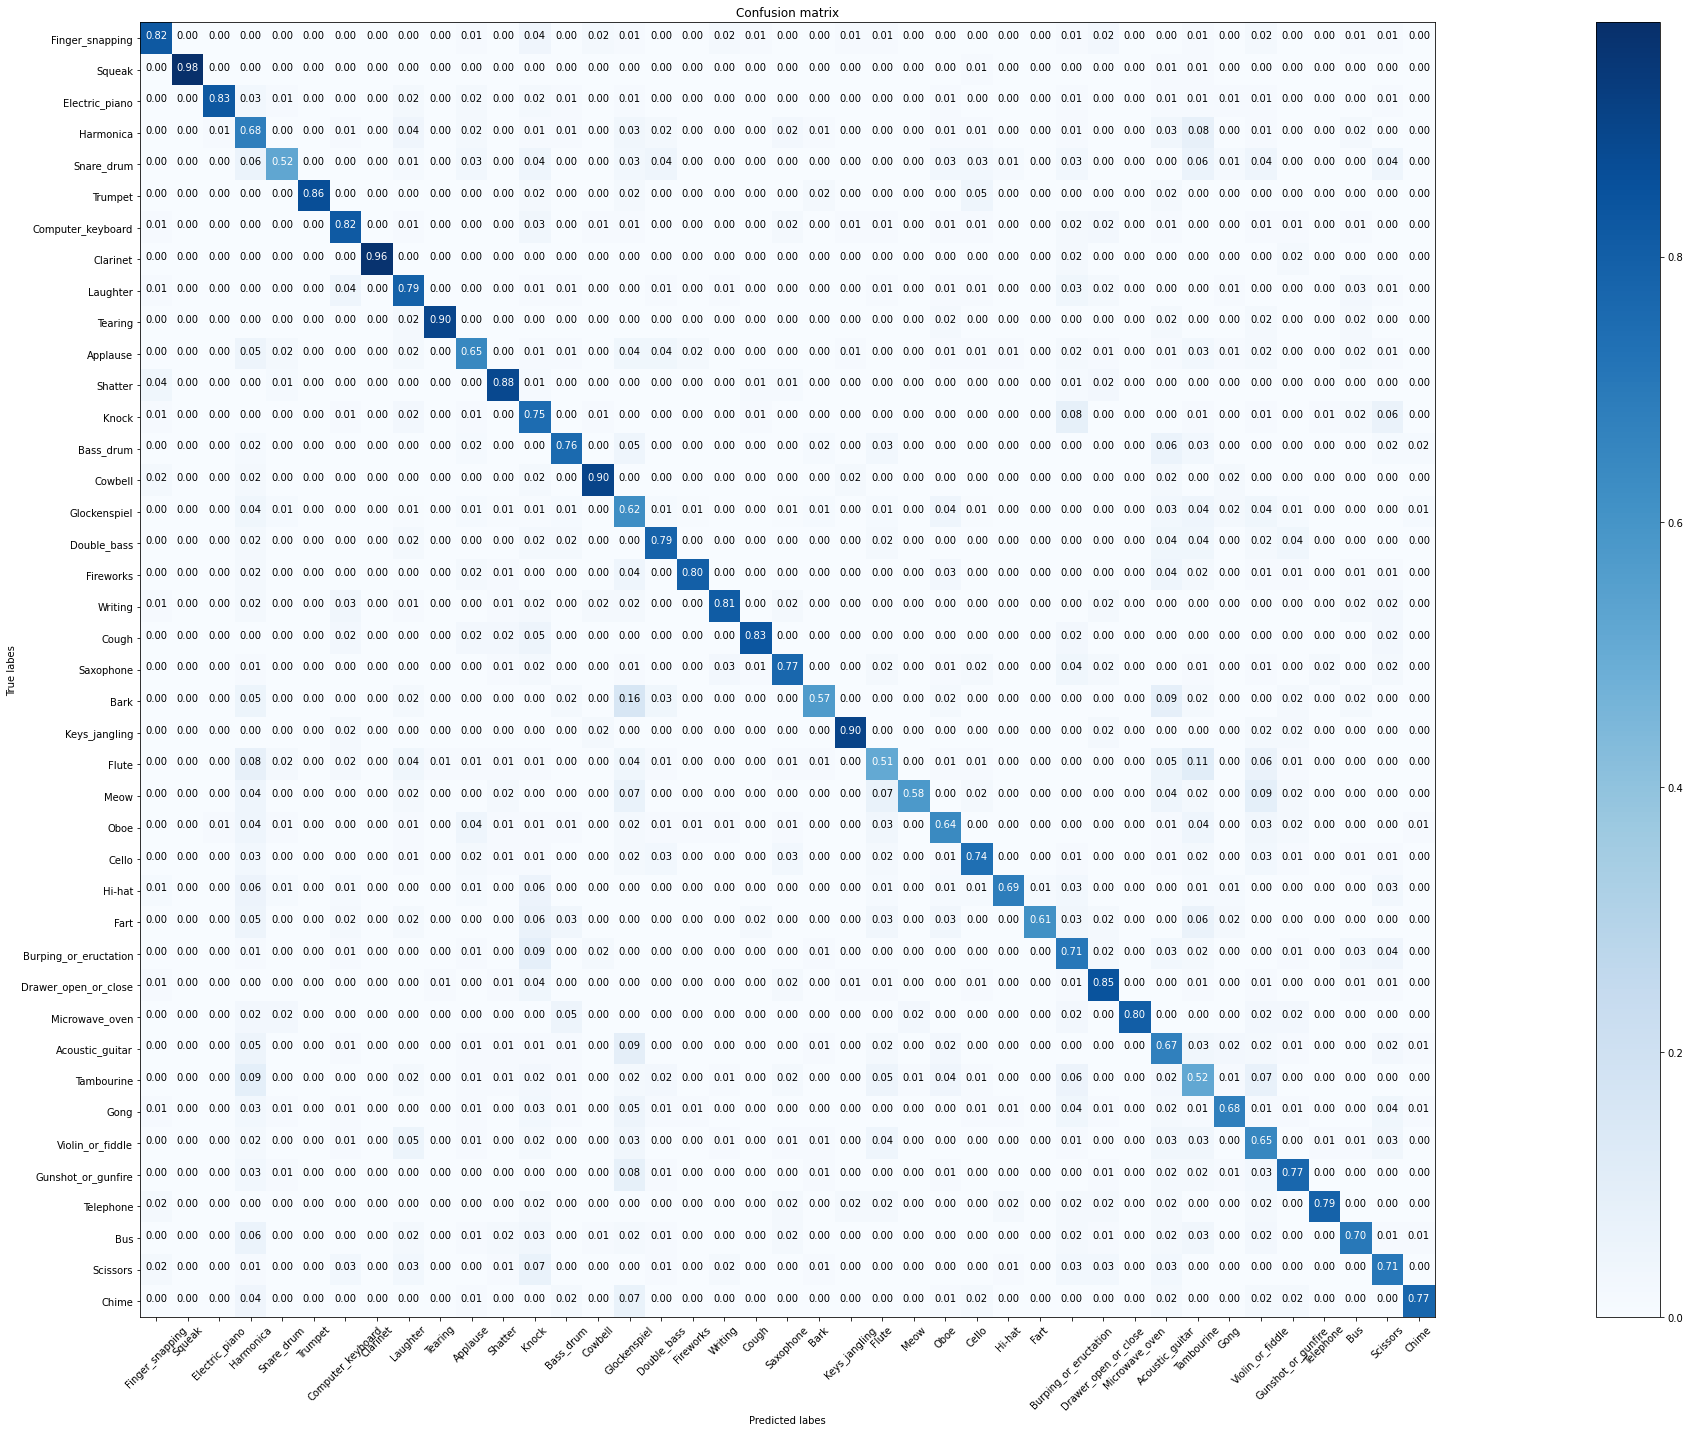

In [17]:
cm = confusion_matrix(label_train, prediction_train)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
title='Confusion matrix'
print(cm)

plt.figure(figsize=(45,20))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)
fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True labes')
plt.xlabel('Predicted labes')
plt.tight_layout()
plt.show()